# Alzheimer MRI Scans Classifier using CNN
**95.234375% Accuracy in classifying MRI scans into - Mild_Demented, Moderate_Demented, Non_Demented or Very_Mild_Demented**





![](https://www.frontiersin.org/files/Articles/501050/fnins-14-00259-HTML-r1/image_m/fnins-14-00259-g001.jpg)

> # Importing Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2

Train_Dir = '/kaggle/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet'
Test_Dir = '/kaggle/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet'

Train_Df = pd.read_parquet(Train_Dir)
Test_Df = pd.read_parquet(Test_Dir)

def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")


Train_Df['image'] = Train_Df['image'].apply(dict_to_image)
Test_Df['image'] = Test_Df['image'].apply(dict_to_image)
print(Train_Df,Test_Df)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

                                                  image  label
0     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      2
1     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
3     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
4     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      2
...                                                 ...    ...
5115  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5116  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5117  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5118  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
5119  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      2

[5120 rows x 2 columns]                                                   image  label
0     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
1     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2     [[[0, 0, 0], [0, 0, 0], 

In [2]:
unique_labels = Train_Df['label'].unique()
print(unique_labels)
num_classes = len(unique_labels)
num_classes

[2 0 3 1]


4

> # Plotting sample image 

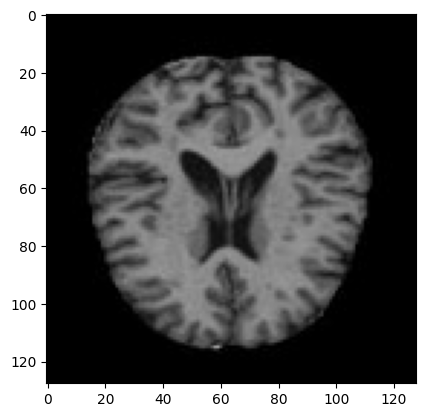

In [3]:
import matplotlib.pyplot as plt


images = Train_Df['image']
for img in images: 
    plt.imshow(img)
    plt.show()
    break

> # Reshaping and One Hot encoding Labels for Categorical Cross Entropy

In [4]:
from tensorflow.keras.utils import to_categorical

X_train_indivisual = Train_Df['image']
y_train = Train_Df['label']

X_test_indivisual = Test_Df['image']
y_test = Test_Df['label']


def resahpe_X_y(X, y):
    X_array = []
    for x in X:
        X_array.append(x)
    
    y = to_categorical(y)

    X_array = np.array(X_array)
    X_array = X_array / 255.0
    y = np.array(y)
    print(X_array.shape, y.shape)
    return X_array, y
X_train, y_train = resahpe_X_y(X_train_indivisual, y_train)
X_test, y_test = resahpe_X_y(X_test_indivisual, y_test)

2024-06-05 20:10:43.950152: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 20:10:43.950288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 20:10:44.085251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(5120, 128, 128, 3) (5120, 4)
(1280, 128, 128, 3) (1280, 4)


> # Defining Model Architecture And Training Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Model = Sequential()

Model.add(Conv2D(32, (3,3),padding = 'same', input_shape = X_train.shape[1:]))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(64, (3,3), padding = 'same'))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Flatten())

Model.add(Dense(num_classes))
Model.add(Activation('softmax'))

Model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

History = Model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


2024-06-05 20:11:03.128610: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2175: 3.31527, expected 2.86333
2024-06-05 20:11:03.128700: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8832: 3.04387, expected 2.59193
2024-06-05 20:11:03.128709: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8960: 3.285, expected 2.83305
2024-06-05 20:11:03.128720: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9600: 3.16471, expected 2.71277
2024-06-05 20:11:03.128738: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12032: 3.08921, expected 2.63726
2024-06-05 20:11:03.128758: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15360: 3.30205, expected 2.8501
2024-06-05 20:11:03.128844: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32768: 4.65504, expected 3.81534
2024-06-05 20:11:03.128852: E exte

 18/128 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.4148 - loss: 1.7856

I0000 00:00:1717618266.941456      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - categorical_accuracy: 0.4633 - loss: 1.3675 - val_categorical_accuracy: 0.5039 - val_loss: 1.0243
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.5702 - loss: 0.9251 - val_categorical_accuracy: 0.6006 - val_loss: 0.8197
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.6318 - loss: 0.7956 - val_categorical_accuracy: 0.7266 - val_loss: 0.6655
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.7540 - loss: 0.5765 - val_categorical_accuracy: 0.7461 - val_loss: 0.5602
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.8446 - loss: 0.3992 - val_categorical_accuracy: 0.8438 - val_loss: 0.4074
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.8998 - loss: 0.2711 - val_categorical_accuracy: 0.8848 - val_loss: 0.3228
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.9152 - loss: 

> # Plotting Accuracy and Loss Grpahs 

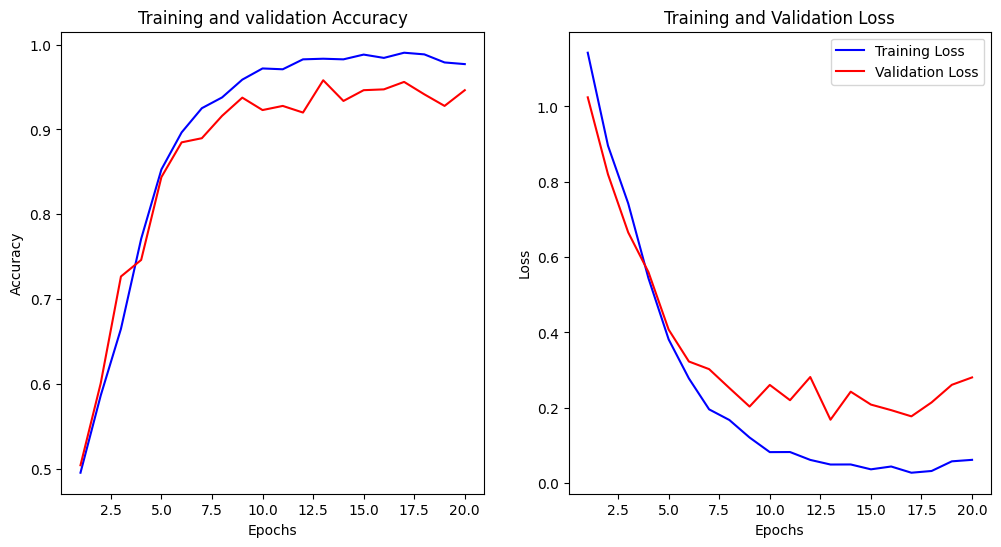

In [6]:
acc = History.history['categorical_accuracy']
loss = History.history['loss']

val_acc = History.history['val_categorical_accuracy']
val_loss = History.history['val_loss']

epochs =  range(1, len(acc) + 1)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

> # Calculating Accuracy on Test Set

In [7]:
y_pred = Model.predict(X_test)
y_predicted = []


for y in y_pred:
    y_predicted.append(np.argmax(y))
    
    
y_true = []
for y in y_test:
    y_true.append(np.argmax(y))

    
Correct_pred_count = 0
for true,pred in zip(y_true,y_predicted):
    if true == pred:
        Correct_pred_count += 1
Accuracy = Correct_pred_count / len(y_pred) * 100
print("Accuracy on Testing Set (Unseen Data): ", Accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy on Testing Set (Unseen Data):  94.0625
